각 폴더별 존재하는 4개의 class를 하나로 합친다.    

## To-do
1. [Rule] RGB format (PIL) Color maps are => (255,0,0) Class 01 / (0,255,0) Class 02 / (0,0,255) Class 03 / (255,255,0) Class 04 / else Background  
2. thresholding  each class image  
3. get (row, col)  
4. Class 02 -> Class -> 01 -> Class 03 -> Class 04 순서로 겹치게  
5. Result, Unique values are (255,0,0) / (0,255,0) / (0,0,255) / (255,255,0)

In [1]:
from PIL import Image
from collections import OrderedDict

import numpy as np
import os
import cv2
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

In [2]:
img = cv2.imread('./data/inha_train/training/before_process_label/00.png')

mapping = {
            (0,0,0) : 0,
            (255,0,0) : 1,
            (0,0,255) : 2}
unique_val = np.unique(img.reshape(-1, img.shape[2]), axis=0)
print('unique val : ', unique_val)

unique val :  [[  0   0   0]
 [  0   0 255]
 [255   0   0]]


In [3]:
import pandas as pd

def get_class_frequency(labels):
    '''
    parameter
        labels (num, ch, H, W)
        
    return
        class frequency tabels (pandas table)
    '''
    
    num_labels, ch, h, w = labels.shape
    for idx in range(num_labels):
        
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-3-8bc847015bac>, line 3)

In [5]:
def totuple(a):
    try:
        return tuple(totuple(i) for i in a)
    except TypeError:
        return a

def make_ordered_mapping(img):
    '''
    parameter 
        img (ch-last format img)
        
    return
        ordered mapping (unique value)
    '''
    unique_val = np.unique(img.reshape(-1, img.shape[2]), axis=0)
    print('unique val : ', unique_val)
    
    ordered_mapping =OrderedDict()
    num_class =0 
    for k in unique_val:
        ordered_mapping[totuple(k)] = num_class
        num_class = num_class+1
        
    
    return ordered_mapping
    

def ch_wise_one_hot_encoding(labels,class_num, mapping):
    '''
    input : patchs (ch first images)
    
    mapping example : 
        mapping = {
            (0,0,0) : 0,
            (255,0,0) : 1,
            (0,0,255) : 2
            }
    
    return patches (num, H, W, class-1)
    '''
    patch_num, c, h, w = labels.shape
    encoded_labels = np.zeros((patch_num, class_num, h, w ))
    
    for idx in range(patch_num):
        ch_cnt =0 
        temp_label = labels[idx]
        temp_label = np.transpose(temp_label, (1,2,0))
        print(np.shape(temp_label))
        
        '''
        mapping 순서 이슈
        '''
        for k in mapping:
            print(mapping[k])
            print(k)
            row,col = np.where(np.all(temp_label == k, axis = -1))
            print('whole pixels : ', 500*760)
            print('num of row, col : ', len(row), len(col))
            encoded_labels[idx, ch_cnt, row,col] = 1
            ch_cnt = ch_cnt + 1
            
    return encoded_labels

img = cv2.imread('./data/inha_train/training/before_process_label/00.png')
unique_val = np.unique(img.reshape(-1, img.shape[2]), axis=0)
mapping = make_ordered_mapping(img)
print(mapping)

img = np.transpose(img, (2,0,1))
img = np.expand_dims(img, 0)
print(np.shape(img))

temp = ch_wise_one_hot_encoding(img,3, mapping)
#print(temp)
unique_val = np.unique(img.reshape(-1, img.shape[2]), axis=0)
#print('unique val : ', unique_val)



unique val :  [[  0   0   0]
 [  0   0 255]
 [255   0   0]]
OrderedDict([((0, 0, 0), 0), ((0, 0, 255), 1), ((255, 0, 0), 2)])
(1, 3, 500, 760)
(500, 760, 3)
0
(0, 0, 0)
whole pixels :  380000
num of row, col :  379566 379566
1
(0, 0, 255)
whole pixels :  380000
num of row, col :  194 194
2
(255, 0, 0)
whole pixels :  380000
num of row, col :  240 240


In [2]:
import random
import numpy as np
import random
import configparser
import os
import cv2
import sys
import configparser
import pandas as pd

sys.path.insert(0, './lib_keras/')

from help_functions import load_hdf5
from help_functions import visualize
from help_functions import group_images
from help_functions import show_on_jupyter
from pre_processing import my_preprocessing
from pre_processing import augmentations
from collections import OrderedDict
from PIL import Image






In [33]:
def totuple(a):
    try:
        return tuple(totuple(i) for i in a)
    except TypeError:
        return a

def make_ordered_mapping(img):
    '''
    parameter 
        img (ch-last format img)
        
    return
        ordered mapping (unique value)
    '''
    unique_val = np.unique(img.reshape(-1, img.shape[2]), axis=0)
    print('unique val : ', unique_val)
    
    ordered_mapping =OrderedDict()
    num_class =0 
    for k in unique_val:
        ordered_mapping[totuple(k)] = num_class
        num_class = num_class+1
        
    
    return ordered_mapping
    

def ch_wise_one_hot_encoding(labels,class_num, mapping):
    '''
    input : patchs (ch first images)
    
    mapping example : 
        mapping = {
            (0,0,0) : 0,
            (255,0,0) : 1,
            (0,0,255) : 2
            }
    
    return patches (num, H, W, class-1)
    '''
    patch_num, c, h, w = labels.shape
    class_frequency_table = pd.DataFrame(columns=['class_0', 'class_1', 'class_2', 'frequency_0', 'frequency_1','frequency_2'])
    
    num_pixels = int(h*w)
    for idx in range(patch_num):
        ch_cnt =0 
        temp_label = labels[idx]
        temp_label = np.transpose(temp_label, (1,2,0))
        #print(np.shape(temp_label))
        
        class_frequency_table.loc[idx] = 0
        
        '''
        mapping 순서 이슈
        '''
        for k in mapping:
            row,col = np.where(np.all(temp_label == k, axis = -1))
            class_pixels = len(row)
            
            
            class_frequency_table.loc[idx,'class_' + str(ch_cnt)] = class_pixels
            class_frequency_table.loc[idx,'frequency_' + str(ch_cnt)] = class_pixels / num_pixels
            ch_cnt = ch_cnt + 1
            
    return class_frequency_table

train_masks = load_hdf5('./data/hdf5_data/inha_oct/inha_oct_groundTruth_train.hdf5')
img = cv2.imread('./data/inha_train/training/before_process_label/00.png')
unique_val = np.unique(img.reshape(-1, img.shape[2]), axis=0)
mapping = make_ordered_mapping(img)


class_frequency_table = ch_wise_one_hot_encoding(train_masks,3, mapping)

class_frequency_table
print(class_frequency_table['class_0'].mean())
print(class_frequency_table['class_1'].mean())
print(class_frequency_table['class_2'].mean())
print(class_frequency_table['frequency_0'].mean())
print(class_frequency_table['frequency_1'].mean())
print(class_frequency_table['frequency_2'].mean())

unique val :  [[  0   0   0]
 [  0   0 255]
 [255   0   0]]
379548.15
311.85
140.0
0.9988109210526316
0.000820657894736842
0.00036842105263157896


In [26]:
temp = pd.DataFrame(columns=['A','B','C'])
temp.loc[0] = ([1,2,3])

temp.loc[1,'B'] = 0
temp['A'] = 1
temp


,A,B,C
0,1,2,3
1,1,0,NaN


In [44]:
temp = np.transpose(train_masks,(0,2,3,1))
temp = temp[1,:,:,:]

print(np.shape(temp))
print( np.unique(temp.reshape(-1, temp.shape[2]), axis=0))

temp = Image.fromarray(temp.astype(np.uint8))
temp.save('./temp.png')

(500, 760, 3)
[[  0.   0.   0.]
 [  0.   0. 255.]
 [255.   0.   0.]]


In [26]:
img = cv2.imread('./data/inha_train/training/before_process_label/00.png')
img_shape = np.shape(img)
channels = img_shape[2]
img_height = img_shape[0]
img_width = img_shape[1]

groundTruth = np.empty((40,img_height,img_width,3))



config = configparser.RawConfigParser()
config.read('pre_configuration.txt')
ground_truth_img_train_path = config.get('path','ground')

print(np.shape(groundTruth))
print(ground_truth_img_train_path)

(40, 500, 760, 3)
./data/inha_train/training/label/


In [32]:
for count, filename in enumerate(sorted(os.listdir(ground_truth_img_train_path)), start=0):
    groundTruth_name = filename
    print ("ground truth name: " + groundTruth_name)
    g_truth = Image.open(ground_truth_img_train_path + groundTruth_name)
    #if len(np.shape(g_truth)) !=2:
    #    g_truth = cv2.imread(ground_truth_img_train_path+groundTruth_name)
        #g_truth = g_truth[:,:,0]
    groundTruth[count] = np.asarray(g_truth)

ground truth name: 0.png
ground truth name: 1.png
ground truth name: 10.png
ground truth name: 11.png
ground truth name: 12.png
ground truth name: 13.png
ground truth name: 14.png
ground truth name: 15.png
ground truth name: 16.png
ground truth name: 17.png
ground truth name: 18.png
ground truth name: 19.png
ground truth name: 2.png
ground truth name: 20.png
ground truth name: 21.png
ground truth name: 22.png
ground truth name: 23.png
ground truth name: 24.png
ground truth name: 25.png
ground truth name: 26.png
ground truth name: 27.png
ground truth name: 28.png
ground truth name: 29.png
ground truth name: 3.png
ground truth name: 30.png
ground truth name: 31.png
ground truth name: 32.png
ground truth name: 33.png
ground truth name: 34.png
ground truth name: 35.png
ground truth name: 36.png
ground truth name: 37.png
ground truth name: 38.png
ground truth name: 39.png
ground truth name: 4.png
ground truth name: 5.png
ground truth name: 6.png
ground truth name: 7.png
ground truth name: 8

/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


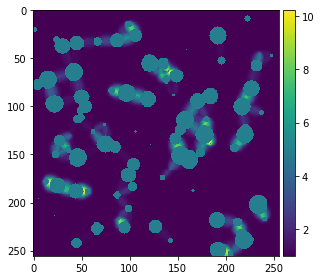

In [34]:
%matplotlib inline
import numpy as np
from skimage.io import imshow
from skimage.measure import label
from scipy.ndimage.morphology import distance_transform_edt
import numpy as np

def generate_random_circles(n = 100, d = 256):
    circles = np.random.randint(0, d, (n, 3))
    x = np.zeros((d, d), dtype=int)
    f = lambda x, y: ((x - x0)**2 + (y - y0)**2) <= (r/d*10)**2
    for x0, y0, r in circles:
        x += np.fromfunction(f, x.shape)
    x = np.clip(x, 0, 1)

    return x

def unet_weight_map(y, wc=None, w0 = 10, sigma = 5):

    """
    Generate weight maps as specified in the U-Net paper
    for boolean mask.

    "U-Net: Convolutional Networks for Biomedical Image Segmentation"
    https://arxiv.org/pdf/1505.04597.pdf

    Parameters
    ----------
    mask: Numpy array
        2D array of shape (image_height, image_width) representing binary mask
        of objects.
    wc: dict
        Dictionary of weight classes.
    w0: int
        Border weight parameter.
    sigma: int
        Border width parameter.

    Returns
    -------
    Numpy array
        Training weights. A 2D array of shape (image_height, image_width).
    """

    labels = label(y)
    no_labels = labels == 0
    label_ids = sorted(np.unique(labels))[1:]

    if len(label_ids) > 1:
        distances = np.zeros((y.shape[0], y.shape[1], len(label_ids)))

        for i, label_id in enumerate(label_ids):
            distances[:,:,i] = distance_transform_edt(labels != label_id)

        distances = np.sort(distances, axis=2)
        d1 = distances[:,:,0]
        d2 = distances[:,:,1]
        w = w0 * np.exp(-1/2*((d1 + d2) / sigma)**2) * no_labels
    else:
        w = np.zeros_like(y)
    if wc:
        class_weights = np.zeros_like(y)
        for k, v in wc.items():
            class_weights[y == k] = v
        w = w + class_weights
    return w

y = generate_random_circles()

wc = {
    0: 1, # background
    1: 5  # objects
}

w = unet_weight_map(y, wc)

imshow(w)

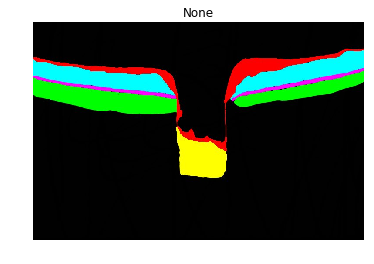

(500, 760, 3)
[[  0   0   0]
 [  0   0   1]
 [  0   0   3]
 ...
 [255 255  26]
 [255 255  29]
 [255 255  39]]
14882


In [29]:
temp = cv2.imread('temp_label.jpeg')
show_on_jupyter(temp)
unique_val = np.unique(temp.reshape(-1, temp.shape[2]), axis=0)

print(np.shape(temp))
print(unique_val)
print(len(unique_val))

In [30]:
encoded_labels = np.zeros((500, 760))

row,col = np.where(temp > (0,0,200))
print(len(row))
encoded_labels[row,col] = 255



show_on_jupyter(encoded_labels,'gray')

ValueError: too many values to unpack (expected 2)